In [0]:
%matplotlib inline
# !pip install "tensorflow>=1.7.0"/
# ! pip install tensorflow-hub

In [0]:
import tensorflow as tf
# import cv2 as cv
import os
import numpy as np
import glob
# # from random import shuffle
from google.colab import drive
import matplotlib.pyplot as plt
import csv
import re
import json
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.layers import Embedding,Input
# from keras.models import Model
# from keras.optimizers import Adam
# from keras.layers import Bidirectional,LSTM,GlobalMaxPool1D,Dense
# from tensorflow.contrib import rnn
from sklearn.utils import shuffle

import tensorflow_hub as hub
# from sklearn.model_selection import train_test_split

In [5]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})

In [7]:
tf.VERSION
sentences=[]
train_target=[]
m=[]
embed_fn = embed_useT('/content/drive/My Drive/USE/')
embedding_matrix=[]

W0712 19:07:06.745163 139917949802368 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"i've","i have",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"that's","that is",text)
    text = re.sub(r"that ' s","that is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"that's","that is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"\'ll"," will",text) 
    text = re.sub(r"\'ve"," have",text)
    text = re.sub(r"\'re"," are",text)
    text = re.sub(r"\'d"," would",text)  
    text = re.sub(r"won't", "will not",text)
    text = re.sub(r"don't", "do not",text)
    text = re.sub(r"can't","can not", text)
    text = re.sub(r"hadn't","had not", text)
    text = re.sub(r"didn't","did not", text)
    text = re.sub(r"wouldn't","would not", text)
    text = re.sub(r"weren't","were not", text)
    text = re.sub(r"shouldn't","should not", text)
    text = re.sub(r"doesn't","does not", text)
    text = re.sub(r"couldn't","could not", text)
    text = re.sub(r"isn't","is not", text)
    text = re.sub(r"hasn't","has not", text)
    text = re.sub(r"wasn't","was not", text)
    text = re.sub(r"haven't","have not", text)
    text = re.sub(r"didn't","did not", text)
    text = re.sub(r"wouldnt'","would not", text)
#     text = re.sub(r"shouldnt'","should not", text)
#     text = re.sub(r"doesnt'","does not", text)
#     text = re.sub(r"couldnt'","could not", text)
#     text = re.sub(r"isnt'","is not", text)
#     text = re.sub(r"wasn't","was not", text)
#     text = re.sub(r"havent'","have not", text)
    text = re.sub(r"aren't","are not", text)
#     text = re.sub(r"werent","were not", text)
    text = re.sub(r" em "," them ", text)
    text = re.sub(r" there's "," there is ", text)
    text = re.sub(r"let's","let us", text)
    text = re.sub(r" who's "," who is ", text)
    text = re.sub(r"\'s","", text)
    text = re.sub(r"'","", text)
# #     text = re.sub(r"arent","are not", text)
#     text = re.sub(r"  "," ", text)
#     text = re.sub(r"[-?!@#$%^&*(~,;)+=_`<>{}.\"']","",text)
#     pattern = r'[^a-zA-z0-9\s]'
#     text = re.sub(pattern, '', text)
    return text

In [0]:
def sent(data,cnt):
#   Participant_transcript=[rows[0].split("\t") for rows in data if len(rows)>0 if rows[0].split("\t")[2] == "Participant" ]
    if cnt==0:
      Participant_transcript=[rows[0].split("\t") for rows in data if len(rows)>0 if rows[0].split("\t")[2] == "Participant" ]
#   print(Participant_transcript)
      words=[clean_text(x[3].strip()).strip() for x in Participant_transcript]
    else:
      words=[clean_text(x[2].strip()).strip() for x in data]
      words.pop(0)
#     print(words)
    for ind,val in enumerate(words):
        a=val.split(' ')
        for ii,tp in enumerate(a):
            if(len(tp)):
                if(tp[0]=='<'and tp[-1]=='>'):
                    a[ii]=tp[1:-1]
                elif(tp[0]=='<' ):
                    a[ii]=tp[1:]
        words[ind]=' '.join(a).strip()        
    m.append(len(words))
#     print(words)
    return words

In [10]:
pth=["/content/drive/My Drive/trans/*RIPT.csv","/content/drive/My Drive/AVEC_trans/development*.csv","/content/drive/My Drive/AVEC_trans/training*.csv","/content/drive/My Drive/AVEC_trans/test*.csv"]
for cnt,p in enumerate(pth):
  for filename in glob.glob(p):#CHANGE PATH
      print(filename)
      if(cnt==0):
        train_target.append(filename.split("/")[-1].split("_")[0])
      else:
        train_target.append(filename.split("/")[-1].split(".")[0][:-11])
      with open(filename,"rt") as f:
        data=csv.reader(f)
        msg_txt=sent(data,cnt)
  #       print(msg_txt)  
        emb=embed_fn(msg_txt)
        a = np.zeros((400-emb.shape[0], 512))
        x=np.vstack((a,emb))
        embedding_matrix.append(x)
        print(emb.shape)

/content/drive/My Drive/trans/300_TRANSCRIPT.csv
(87, 512)
/content/drive/My Drive/trans/302_TRANSCRIPT.csv
(97, 512)
/content/drive/My Drive/trans/301_TRANSCRIPT.csv
(104, 512)
/content/drive/My Drive/trans/303_TRANSCRIPT.csv
(103, 512)
/content/drive/My Drive/trans/304_TRANSCRIPT.csv
(104, 512)
/content/drive/My Drive/trans/307_TRANSCRIPT.csv
(186, 512)
/content/drive/My Drive/trans/309_TRANSCRIPT.csv
(94, 512)
/content/drive/My Drive/trans/308_TRANSCRIPT.csv
(154, 512)
/content/drive/My Drive/trans/305_TRANSCRIPT.csv
(288, 512)
/content/drive/My Drive/trans/306_TRANSCRIPT.csv
(108, 512)
/content/drive/My Drive/trans/310_TRANSCRIPT.csv
(148, 512)
/content/drive/My Drive/trans/311_TRANSCRIPT.csv
(129, 512)
/content/drive/My Drive/trans/312_TRANSCRIPT.csv
(126, 512)
/content/drive/My Drive/trans/313_TRANSCRIPT.csv
(114, 512)
/content/drive/My Drive/trans/314_TRANSCRIPT.csv
(375, 512)
/content/drive/My Drive/trans/316_TRANSCRIPT.csv
(136, 512)
/content/drive/My Drive/trans/315_TRANSCRIP

In [0]:
embedding_matrix=np.asarray(embedding_matrix)

In [12]:
print(embedding_matrix.shape)
print(len(train_target))

(464, 400, 512)
464


In [13]:
print(train_target)

['300', '302', '301', '303', '304', '307', '309', '308', '305', '306', '310', '311', '312', '313', '314', '316', '315', '317', '319', '318', '320', '321', '323', '322', '325', '326', '329', '327', '328', '324', '330', '331', '334', '332', '333', '336', '337', '335', '338', '339', '340', '344', '341', '343', '345', '348', '346', '350', '347', '349', '353', '356', '355', '352', '358', '351', '360', '359', '357', '354', '361', '362', '363', '368', '364', '369', '370', '365', '366', '367', '372', '374', '373', '379', '371', '376', '375', '377', '378', '380', '381', '383', '382', '384', '386', '385', '388', '390', '387', '389', '391', '393', '392', '396', '395', '401', '397', '402', '399', '400', '403', '406', '405', '404', '412', '408', '411', '409', '410', '407', '413', '415', '414', '416', '419', '418', '420', '421', '417', '422', '423', '425', '426', '424', '430', '429', '432', '427', '431', '428', '433', '435', '434', '436', '440', '438', '441', '439', '442', '437', '443', '444', '446'

In [14]:
train_data,train_lbl=[],[]
pth=["/content/drive/My Drive/AVEC_trans/metadata.csv"]
for p in pth:
    with open(p,"rt") as f:
        l_data=csv.reader(f)
        for r in l_data:
          if len(r):
            if r[0] in train_target and ('training') in r[0]:
              print(r[0],r[3])
#               print(embedding_matrix[train_target.index(r[0])])
              train_data.append(embedding_matrix[train_target.index(r[0])])
              train_lbl.append(int(r[3])) #change  this t0 2 for DAIC
            

training_001 4
training_002 0
training_003 6
training_004 7
training_005 4
training_006 22
training_007 15
training_008 4
training_009 21
training_010 2
training_011 7
training_012 1
training_013 2
training_014 6
training_015 3
training_016 13
training_017 5
training_018 1
training_019 5
training_020 10
training_021 2
training_022 4
training_023 4
training_024 1
training_025 12
training_026 18
training_027 5
training_028 12
training_029 10
training_030 15
training_031 11
training_032 1
training_033 7
training_034 15
training_035 23
training_036 20
training_037 5
training_038 14
training_039 10
training_040 11
training_041 18
training_042 10
training_043 10
training_044 7
training_045 7
training_046 13
training_047 4
training_048 0
training_049 20
training_050 0
training_051 0
training_052 0
training_053 19
training_054 7
training_055 0
training_056 0
training_057 13
training_058 5
training_059 12
training_060 16
training_061 1
training_062 2
training_063 10
training_064 7
training_065 

In [15]:
print(train_data[1])
print(train_lbl)
train_data=np.asarray(train_data,dtype=np.float32)
train_lbl=np.asarray(train_lbl,dtype=np.float32)
train_lbl=np.reshape(train_lbl,(-1,1))

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00755092 -0.04642142  0.04226645 ...  0.01814031 -0.05435348
   0.02585908]
 [ 0.02137608  0.02894528  0.03147536 ...  0.01498037 -0.03433718
  -0.0333911 ]
 [-0.01483331  0.02984936  0.05834176 ...  0.0148358   0.06883732
  -0.01434577]]
[4, 0, 6, 7, 4, 22, 15, 4, 21, 2, 7, 1, 2, 6, 3, 13, 5, 1, 5, 10, 2, 4, 4, 1, 12, 18, 5, 12, 10, 15, 11, 1, 7, 15, 23, 20, 5, 14, 10, 11, 18, 10, 10, 7, 7, 13, 4, 0, 20, 0, 0, 0, 19, 7, 0, 0, 13, 5, 12, 16, 1, 2, 10, 7, 15, 8, 11, 2, 14, 9, 9, 1, 7, 5, 5, 7, 7, 0, 0, 17, 2, 3, 10, 12, 0, 10, 16, 3, 7, 10, 3, 3, 10, 12, 3, 20, 5, 0, 1, 3, 1, 2, 0, 2, 1, 19, 1, 7, 1, 0, 1, 2, 9, 1, 17, 6, 3, 5, 16, 17, 9, 0, 0, 9, 0, 3, 3, 0, 3, 4, 3, 2, 1, 7, 1, 15, 2, 0, 0, 3, 2, 8, 0, 0, 4, 2, 1, 0, 10, 17, 6, 2, 2, 13, 12, 22, 18, 0, 7, 5, 0

In [16]:
print(train_data.shape)
print(train_lbl.shape)

(163, 400, 512)
(163, 1)


In [17]:
test_data,test_lbl=[],[]


with open("/content/drive/My Drive/AVEC_trans/metadata.csv","rt") as f:
  l_data=csv.reader(f)
  for r in l_data:
    if len(r):
      if r[0] in train_target and('development' in r[0]):
        print(r[0],r[3])
        test_data.append(embedding_matrix[train_target.index(r[0])])
        test_lbl.append(int(r[3]))   #change  this t0 2 for DAIC
test_data=np.asarray(test_data,dtype=np.float32)
test_lbl=np.asarray(test_lbl,dtype=np.float32)
test_lbl=np.reshape(test_lbl,(-1,1)) 

development_01 2
development_02 3
development_03 0
development_04 8
development_05 11
development_06 20
development_07 8
development_08 5
development_09 7
development_10 9
development_11 11
development_12 16
development_13 11
development_14 12
development_15 9
development_16 9
development_17 2
development_18 16
development_19 0
development_20 17
development_21 2
development_22 9
development_23 11
development_24 0
development_25 12
development_26 3
development_27 0
development_28 6
development_29 2
development_30 10
development_31 8
development_32 0
development_33 18
development_34 6
development_35 18
development_36 4
development_37 1
development_38 1
development_39 2
development_40 4
development_41 0
development_42 6
development_43 7
development_44 1
development_45 9
development_46 4
development_47 12
development_48 3
development_49 1
development_50 4
development_51 0
development_52 3
development_53 0
development_54 7
development_55 19
development_56 0


In [18]:
print(test_data.shape)
print(test_lbl.shape)
print(test_lbl)
print(test_data[1])

(56, 400, 512)
(56, 1)
[[ 2.]
 [ 3.]
 [ 0.]
 [ 8.]
 [11.]
 [20.]
 [ 8.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [16.]
 [11.]
 [12.]
 [ 9.]
 [ 9.]
 [ 2.]
 [16.]
 [ 0.]
 [17.]
 [ 2.]
 [ 9.]
 [11.]
 [ 0.]
 [12.]
 [ 3.]
 [ 0.]
 [ 6.]
 [ 2.]
 [10.]
 [ 8.]
 [ 0.]
 [18.]
 [ 6.]
 [18.]
 [ 4.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 4.]
 [ 0.]
 [ 6.]
 [ 7.]
 [ 1.]
 [ 9.]
 [ 4.]
 [12.]
 [ 3.]
 [ 1.]
 [ 4.]
 [ 0.]
 [ 3.]
 [ 0.]
 [ 7.]
 [19.]
 [ 0.]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.02732479  0.04398277  0.01024205 ... -0.00256935 -0.0620723
  -0.02639482]
 [-0.02513769  0.01115965  0.06200876 ...  0.0099948   0.04954797
   0.00045482]
 [-0.02198877  0.0255063   0.0782881  ...  0.01616176  0.07393359
  -0.04193816]]


In [0]:
val_data,val_lbl=[],[]


with open("/content/drive/My Drive/trans/full_test_split.csv","rt") as f:
  l_data=csv.reader(f)
  for r in l_data:
    if len(r):
      if r[0] in train_target:
        val_data.append(embedding_matrix[train_target.index(r[0])])
        val_lbl.append(int(r[2]))
val_data=np.asarray(val_data,dtype=np.float32)
val_lbl=np.asarray(val_lbl,dtype=np.float32)
val_lbl=np.reshape(val_lbl,(-1,1))  

In [20]:
print(val_data.shape)
print(val_lbl.shape)
print(val_data[1])
print(val_lbl)

(47, 400, 512)
(47, 1)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.01892386 -0.0011926   0.04492001 ... -0.00144262 -0.04400576
   0.0233737 ]
 [ 0.03264365  0.03899784  0.03827451 ... -0.01582617 -0.01046659
  -0.03395808]
 [ 0.0100885  -0.03508966  0.0581382  ...  0.07674594 -0.0479061
  -0.01093431]]
[[ 2.]
 [ 3.]
 [ 0.]
 [22.]
 [15.]
 [21.]
 [ 1.]
 [ 1.]
 [ 1.]
 [18.]
 [ 5.]
 [10.]
 [ 5.]
 [18.]
 [13.]
 [ 0.]
 [12.]
 [ 9.]
 [ 1.]
 [15.]
 [ 2.]
 [ 5.]
 [ 7.]
 [17.]
 [ 3.]
 [ 0.]
 [12.]
 [ 0.]
 [10.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 8.]
 [ 2.]
 [ 6.]
 [ 9.]
 [ 1.]
 [17.]
 [17.]
 [ 9.]
 [ 2.]
 [ 9.]
 [ 0.]
 [ 3.]
 [ 3.]
 [ 1.]
 [ 7.]]


In [0]:

# bidirectional lstms
def network2(xx,bs,dp,kp):
  
  with tf.variable_scope('GEN'):

    lstms_fw = [tf.nn.rnn_cell.LSTMCell(size,use_peepholes=True) for size in [200,200]]
    lstms_bw = [tf.nn.rnn_cell.LSTMCell(size,use_peepholes=True) for size in [200,200]]

    drops_fw = [tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=kp[0],variational_recurrent=False,dtype=tf.float32) for lstm in lstms_fw]
    drops_bw= [tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=kp[1],variational_recurrent=False,dtype=tf.float32) for lstm in lstms_bw]


    lstm_output,output_fw, output_bw =tf.contrib.rnn.stack_bidirectional_dynamic_rnn(cells_fw=drops_fw,cells_bw=drops_bw,inputs=xx,dtype=tf.float32)
    fs=tf.reduce_sum(lstm_output,1)

    logits=tf.nn.dropout(fs,keep_prob=dp)
    logits=tf.layers.batch_normalization(tf.nn.relu(tf.layers.dense(logits,500)))

    logits=tf.nn.dropout(logits,keep_prob=dp)
    logits=tf.layers.batch_normalization(tf.nn.relu(tf.layers.dense(logits,100)))
    logits=tf.nn.dropout(logits,keep_prob=dp)
    logits=tf.layers.batch_normalization(tf.nn.relu(tf.layers.dense(logits,60)))
    logits= tf.layers.dense(logits,1)
    
    return logits

In [0]:
path = "/content/drive/My Drive/saved_model_submission_avec/model.ckpt"

In [41]:
mm=22.0
for _ in range (1): 
  tf.reset_default_graph()
  train_graph=[]
  test_graph=[]
  val_graph=[]
  beta=0.001
  x_axis=[]
  BATCH_SIZE=32
  EPOCHS=1000

  X = tf.placeholder(tf.float32, shape=[None,400,512])
  Y=tf.placeholder(tf.float32, shape=[None,1])
  keep_prob= tf.placeholder(tf.float32)
  drpouts= tf.placeholder(tf.float32)
  batch_size = tf.placeholder(tf.int32, [], name='batch_size')

  # embedding_matrix_tmp=tf.Variable(embedding_matrix,name="emb")
  # # word_embeddings = tf.get_variable("emb",[len(word2idx)+1, EMB_DIM])
  # xx= tf.nn.embedding_lookup(embedding_matrix_tmp,X)
  # print(xx.shape,drpouts,keep_prob)



  logits=network2(X,batch_size,drpouts,keep_prob)
  # print(logits.shape)

  variables_to_train=tf.trainable_variables()
  print(variables_to_train)

  # regularization_cost = tf.reduce_sum([ tf.nn.l2_loss(v) for v in variables_to_train if "bias" not in v.name ])
  # loss=tf.reduce_mean(tf.reduce_mean(tf.losses.mean_squared_error(labels=Y,predictions=logits)) + beta*regularization_cost)
  loss=tf.reduce_mean(tf.losses.mean_squared_error(labels=Y,predictions=logits))

  # with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
  optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(loss)

  # config = tf.ConfigProto()
  # config.gpu_options.allow_growth = True  
  saver = tf.train.Saver()
  
  
  with tf.Session() as sess:
    try:
      saver.restore(sess,path)
      print('restored')
      los_test= sess.run(loss ,feed_dict={X:test_data,Y:test_lbl,keep_prob:[1.0,1.0],drpouts:1.0,batch_size:len(test_data)})
      los_val= sess.run(loss,feed_dict={X:val_data,Y:val_lbl,keep_prob:[1.0,1.0],drpouts:1.0,batch_size:len(val_data)})
      print("TEST LOSS FROM RESTORED MODEL AVEC : ", los_test)
      print("VAL ON DAIC : ", los_val)
      mm = los_test
    except:
      print('No pre-saved weights found')  
      sess.run(tf.global_variables_initializer())

    for ep in range(EPOCHS):
      sm=[]
      train_data,train_lbl=shuffle(train_data,train_lbl)
      for j in range(len(train_data)//BATCH_SIZE):
        ls1=train_data[j*BATCH_SIZE:(j*BATCH_SIZE+BATCH_SIZE)]
        ls2=train_lbl[j*BATCH_SIZE:(j*BATCH_SIZE+BATCH_SIZE)]
  # #       print(ls1.shape,ls2.shape)
        _, los_train= sess.run([optimizer,loss], feed_dict={X:ls1,Y:ls2,keep_prob:[1.0,1.0],drpouts:1.0,batch_size:BATCH_SIZE})
        sm.append(los_train)
  #     los_train/=BATCH_SIZE
      print(sm)
      print("epoch: %d      train_loss: %f "%(ep,sum(sm)/len(sm)))

      train_graph.append(sum(sm)/len(sm))
      sm=[]
      los_val= sess.run(loss,feed_dict={X:val_data,Y:val_lbl,keep_prob:[1.0,1.0],drpouts:1.0,batch_size:len(val_data)})
      sm.append(los_val)  
      print("epoch: %d      validation_loss_DAIC: %f "%(ep,sum(sm)/len(sm)))
      val_graph.append(sum(sm)/len(sm))
      sm=[]
      los_test= sess.run(loss ,feed_dict={X:test_data,Y:test_lbl,keep_prob:[1.0,1.0],drpouts:1.0,batch_size:len(test_data)})
      sm.append(los_test)  
      print("epoch: %d      test_loss: %f "%(ep,sum(sm)/len(sm)))

      test_graph.append(sum(sm)/len(sm))
      if (los_test<mm) and (abs(los_test-los_val)<4):
#           save_path = saver.save(sess, path)
          mm=los_test
          print('saved')
      x_axis.append(ep)

[<tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/fw/lstm_cell/kernel:0' shape=(712, 800) dtype=float32_ref>, <tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/fw/lstm_cell/bias:0' shape=(800,) dtype=float32_ref>, <tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/fw/lstm_cell/w_f_diag:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/fw/lstm_cell/w_i_diag:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/fw/lstm_cell/w_o_diag:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/bw/lstm_cell/kernel:0' shape=(712, 800) dtype=float32_ref>, <tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/bw/lstm_cell/bias:0' shape=(800,) dtype=float32_ref>, <tf.Variable 'GEN/stack_bidirectional_rnn/cell_0/bidirectional_rnn/bw/lstm_cell/w_f_diag:0' shape=(200,) dtype=float32_ref>, <tf

KeyboardInterrupt: ignored

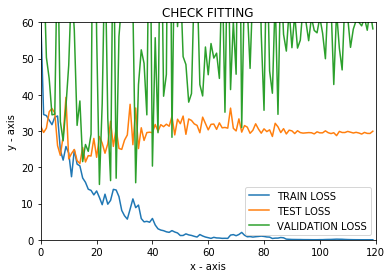

In [0]:
plt.plot(x_axis,train_graph, label = "TRAIN LOSS")
plt.plot(x_axis,test_graph, label = "TEST LOSS")
plt.plot(x_axis,val_graph, label = "VALIDATION LOSS")
plt.ylim(0,60) 
plt.xlim(0,120) 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
plt.title('CHECK FITTING')
plt.legend()
plt.show()

In [0]:
#LAST CELL OUTPUT

In [0]:
ss=[i for i in train_target  if 'test' in i]
ss.sort()

In [0]:
ch_data,ch_lbl=[],[]
# pth=["/content/drive/My Drive/AVEC_trans/metadata.csv"]
# for p in pth:
#     with open(p,"rt") as f:
#         l_data=csv.reader(f)
#         for r in l_data:
#           if len(r):
#             print(r[0])
for ix in ss:
  if ix in train_target and ('test') in ix:
    print(ix)
    #               print(embedding_matrix[train_target.index(r[0])])
    ch_data.append(embedding_matrix[train_target.index(ix)])
#     ch_lbl.append(int(r[3])) #change  this t0 2 for DAIC

test_01
test_02
test_03
test_04
test_05
test_06
test_07
test_08
test_09
test_10
test_11
test_12
test_13
test_14
test_15
test_16
test_17
test_18
test_19
test_20
test_21
test_22
test_23
test_24
test_25
test_26
test_27
test_28
test_29
test_30
test_31
test_32
test_33
test_34
test_35
test_36
test_37
test_38
test_39
test_40
test_41
test_42
test_43
test_44
test_45
test_46
test_47
test_48
test_49
test_50
test_51
test_52
test_53
test_54
test_55
test_56


In [0]:
ch_data=np.asarray(ch_data)
print(ch_data.shape)

(56, 400, 512)


In [0]:
sess = tf.Session()
saver.restore(sess,path)
print('restored')
test_labels= sess.run(logits,feed_dict={X:ch_data,keep_prob:[1.0,1.0],drpouts:1.0,batch_size:len(ch_data)})

restored


In [0]:
tl=test_labels.tolist()

In [0]:
print(tl)

[[8.810721397399902], [7.401392459869385], [8.165475845336914], [4.761852741241455], [6.948866367340088], [10.533629417419434], [2.9767556190490723], [6.959987640380859], [3.4902536869049072], [3.3546388149261475], [2.397564172744751], [4.442254543304443], [3.2095823287963867], [14.911883354187012], [3.7160465717315674], [5.995165824890137], [3.7093605995178223], [6.454702377319336], [4.695026397705078], [4.243010997772217], [10.214088439941406], [11.595799446105957], [5.54764986038208], [4.230382919311523], [12.408016204833984], [8.119274139404297], [6.590988636016846], [11.935562133789062], [14.175972938537598], [3.984208345413208], [8.822432518005371], [15.497466087341309], [16.79469108581543], [5.233889579772949], [2.1824069023132324], [2.9053423404693604], [19.72413444519043], [7.352060317993164], [5.469595909118652], [8.834210395812988], [11.680472373962402], [19.656362533569336], [8.870598793029785], [7.570409297943115], [6.1725592613220215], [9.780847549438477], [7.549165725708

In [0]:
print(tl)

[[8.753992080688477], [7.841732501983643], [8.117417335510254], [4.8070149421691895], [6.376358509063721], [10.780657768249512], [4.8684868812561035], [8.036492347717285], [4.692132472991943], [3.7114644050598145], [2.2103078365325928], [5.234386444091797], [5.414912700653076], [16.705219268798828], [4.2320709228515625], [5.9807448387146], [4.262712001800537], [6.330052375793457], [4.7051472663879395], [4.5884175300598145], [14.517812728881836], [12.33820915222168], [5.905221939086914], [4.9992194175720215], [14.698342323303223], [10.203514099121094], [6.535166263580322], [13.749910354614258], [15.586673736572266], [4.407713413238525], [10.34394359588623], [18.28282928466797], [19.282026290893555], [7.3540873527526855], [1.870913028717041], [4.404438495635986], [25.33416748046875], [5.924044132232666], [7.348652362823486], [8.502912521362305], [13.459229469299316], [22.711345672607422], [9.618500709533691], [9.065059661865234], [6.451694965362549], [10.905386924743652], [8.039307594299

In [0]:
for ii,xyx in enumerate(tl):
  print(ii+1,round(xyx[0]))

1 9
2 8
3 8
4 5
5 6
6 11
7 5
8 8
9 5
10 4
11 2
12 5
13 5
14 17
15 4
16 6
17 4
18 6
19 5
20 5
21 15
22 12
23 6
24 5
25 15
26 10
27 7
28 14
29 16
30 4
31 10
32 18
33 19
34 7
35 2
36 4
37 25
38 6
39 7
40 9
41 13
42 23
43 10
44 9
45 6
46 11
47 8
48 18
49 5
50 10
51 11
52 5
53 4
54 26
55 6
56 1


In [0]:
cvv=[]

for ik,jk in enumerate(ss):
  cvv.append([jk,str(round(tl[ik][0]))])
print(len(cvv))  

56


In [0]:
with open('/content/drive/My Drive/ASR1_test_results.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(cvv)